# Faster R-CNN Inferencing using OpenCV DNN

In [1]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv2.__version__

'4.5.1'

In [2]:
from utils_baru import Utils

utils = Utils()

In [3]:
# load label class coco dataset

classesFile = "bisa.json"
with open(classesFile) as json_labels:
    classes = json.load(json_labels)
 
print("number of class :", len(classes))
classes

number of class : 4


{'0': 'Tembok', '1': 'Pintu', '2': 'Meja', '3': 'Kursi'}

In [4]:
# load petrained model (.pb & .pbtxt) faster R-CNN with backbone Resnet 50 on COCO dataset

net = cv2.dnn.readNetFromTensorflow("model/inference_graph_140k/frozen_inference_graph.pb", 
                                    "model/inference_graph_140k/opencv_dnn_140k.pbtxt")
#net = cv2.dnn.readNetFromTensorflow("model/inference_graph_100k/frozen_inference_graph.pb","0")
#cv2.dnn.writeTextGraph('model/frozen_inference_graph.pb', 'model/faster_rcnn_inception_v2_custom_dataset.pbtxt')

In [5]:
# set CUDA as backend & target OpenCV DNN

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [6]:
# # get output layers
# layerOutput = net.getUnconnectedOutLayersNames()
# print(layerOutput)

In [7]:
dataset_folder = "test_img/"
target_w = 750
target_h = 750
names = []
images = []
out = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:100]: # limit only 70 face per class
        if name.find(".jpg") > -1 :
            layerOutput = net.getUnconnectedOutLayersNames()
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = cv2.resize(img, (target_w,target_h))
            blob = cv2.dnn.blobFromImage(img, 1 , (target_w, target_h),swapRB=True, crop=False)
            net.setInput(blob)
            output = net.forward(layerOutput)
            images.append(img)
            out.append(output)
           # names.append(folder)

In [20]:
mkdir hasil_deteksi_video_1


A subdirectory or file hasil_deteksi_video_1 already exists.


Pintu (93.03 %)
Kursi (78.17 %)
Kursi (78.60 %)
Kursi (74.85 %)
Kursi (77.93 %)
Pintu (78.70 %)
Pintu (80.14 %)
Pintu (78.05 %)
Pintu (76.84 %)
Pintu (95.28 %)
Pintu (77.72 %)
Pintu (94.06 %)
Pintu (77.32 %)
Kursi (75.95 %)
Kursi (78.21 %)
Kursi (76.61 %)
Kursi (81.39 %)
Kursi (82.78 %)
Kursi (85.45 %)
Kursi (86.98 %)
Kursi (86.80 %)
Pintu (98.55 %)
Pintu (92.07 %)
Kursi (84.78 %)
Kursi (86.02 %)
Kursi (86.65 %)
Kursi (83.44 %)
Kursi (84.07 %)
Kursi (82.94 %)
Kursi (83.22 %)
Kursi (84.07 %)
Kursi (83.64 %)
Kursi (83.47 %)
Pintu (92.38 %)
Pintu (98.59 %)
Kursi (88.01 %)
Kursi (88.09 %)
Kursi (85.29 %)
Kursi (83.30 %)
Kursi (84.89 %)
Kursi (85.07 %)
Kursi (83.52 %)
Kursi (82.98 %)
Kursi (82.52 %)
Pintu (92.84 %)
Kursi (78.48 %)
Pintu (95.36 %)
Kursi (73.14 %)
Kursi (71.80 %)
Pintu (75.84 %)
Pintu (76.37 %)
Pintu (92.34 %)
Pintu (77.09 %)
Pintu (75.86 %)
Pintu (98.54 %)
Pintu (72.67 %)
Pintu (73.41 %)
Pintu (83.32 %)
Pintu (84.96 %)
Pintu (85.36 %)
Pintu (84.64 %)
Pintu (86.74 %)
Pintu (9

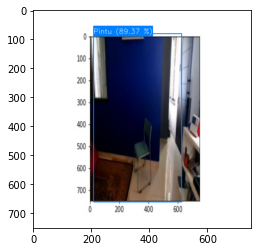

In [8]:
i = 0
n = 1
for gambar in images:
    img = utils.postprocess(out[i], gambar , classes, font_size=0.8, confThreshold=70)
    #print(img.shape[:2])
    #IMAGE_SIZE = (8, 17)
    # show image
    #plt.figure(figsize = (8,17))
    plt.imshow(img[:,:,::-1])
    plt.savefig('hasil_deteksi_video_1/video_test%s.jpg'%(n))
    i=i+1
    n=n+1

# Inferencing using Video Stream

- Run script `faster_r-cnn_flask.py` in terminal,
```
python3 faster_r-cnn_flask.py
```